In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
path = 'traindats.csv'
data = pd.read_csv(path)
data.head()

,PulseNo,TotalArea,TailArea,Classification
0,1,7616,4568,Neutron
1,2,7616,4584,Neutron
2,3,7616,4860,Neutron
3,4,7616,4548,Neutron
4,5,7616,4344,Neutron


In [3]:
from sklearn.preprocessing import LabelEncoder
lab_encod = LabelEncoder()
data['Classification_encod'] = lab_encod.fit_transform(data['Classification'])
data = data.drop(['Classification'],axis = 'columns')
data.head()

,PulseNo,TotalArea,TailArea,Classification_encod
0,1,7616,4568,1
1,2,7616,4584,1
2,3,7616,4860,1
3,4,7616,4548,1
4,5,7616,4344,1


In [4]:
x = data.iloc[:,1:]
x = x.drop(['Classification_encod'],axis = 'columns')
y = data.iloc[:,-1]
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns = ['TotalArea','TailArea'])
x = x.values
y = y.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,
                                                 random_state = 42)
print("Training data shape",x_train.shape)
print("Test data shape",x_test.shape)

Training data shape (43590, 2)
Test data shape (14531, 2)


In [5]:
#Classification using KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
accuracy_score = knn.score(x_test,y_test)
print("Accuracy",accuracy_score)

Accuracy 0.9941504369967655


In [6]:
#Finding the best k value
nearest_neighbours = np.arange(1,20)
train_accuracy = np.empty(len(nearest_neighbours))
test_accuracy = np.empty(len(nearest_neighbours))

In [7]:
for i,k in enumerate(nearest_neighbours):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    
    temp_train_acc = knn.score(x_train,y_train)
    temp_test_acc = knn.score(x_test,y_test)
    train_accuracy[i] = temp_train_acc
    test_accuracy[i] = temp_test_acc

In [8]:
print(train_accuracy)
print(test_accuracy)

[1.         0.99738472 0.99766001 0.99704061 0.99722413 0.99628355
 0.99674237 0.99610002 0.99575591 0.99554944 0.99632943 0.99536591
 0.99580179 0.99511356 0.99577885 0.99520532 0.99554944 0.99504474
 0.99548061]
[0.99649026 0.99545799 0.99518271 0.99497626 0.99470098 0.99353107
 0.99415044 0.99353107 0.99366871 0.99353107 0.99408162 0.99346225
 0.9940128  0.99304934 0.99332462 0.9932558  0.99373753 0.99318698
 0.99332462]


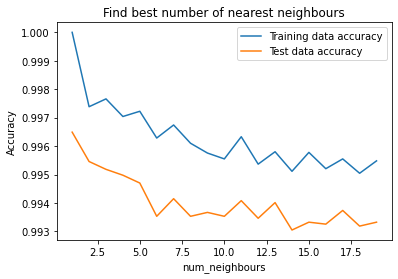

In [9]:
plt.plot(nearest_neighbours,train_accuracy,label = 'Training data accuracy')
plt.plot(nearest_neighbours,test_accuracy,label = 'Test data accuracy')
plt.legend()
plt.xlabel('num_neighbours')
plt.ylabel('Accuracy')
plt.title('Find best number of nearest neighbours')
plt.show()

In [10]:
best_nearest_neighbors = 3
knn_best = KNeighborsClassifier(n_neighbors = best_nearest_neighbors)
knn_best.fit(x_train,y_train)
accuracy_knn = knn_best.score(x_test,y_test)
y_pred = knn_best.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[10826    39]
 [   31  3635]]


In [13]:
classification_repo = classification_report(y_test,y_pred)
print(classification_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10865
           1       0.99      0.99      0.99      3666

    accuracy                           1.00     14531
   macro avg       0.99      0.99      0.99     14531
weighted avg       1.00      1.00      1.00     14531



In [14]:
print("Accuracy using K Nearest Neighbors",accuracy_knn)

Accuracy using K Nearest Neighbors 0.9951827128208658
